# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [4]:
data = pd.read_csv("Categorical.csv")
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [18]:
continent_uniques = data['continent'].unique()
data_mapped = data.copy()

for i in range(len(data_mapped['continent'])):
    for j in range(len(continent_uniques)):
        if data_mapped['continent'].values[i] == continent_uniques[j]:
            data_mapped['continent'].values[i] = j

data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,2
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,3
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2


## Select the features

In [22]:
x = data_mapped.iloc[:, 1:len(data_mapped)]
x

,Longitude,Latitude,continent
0,-69.982677,12.520880,0
1,66.004734,33.835231,1
2,17.537368,-12.293361,2
3,-63.064989,18.223959,0
4,20.049834,41.142450,3
...,...,...,...
236,-172.164851,-13.753243,5
237,47.586762,15.909280,1
238,25.083901,-29.000341,2
239,27.774759,-13.458242,2


## Clustering

Use 4 clusters initially.

In [42]:
kmeans = KMeans(8)

## Clustering results

In [43]:
cluster = kmeans.fit_predict(x)
cluster

C:\Users\42128\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\42128\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 7, 4, 2, 1, 1, 1, 7, 2, 7, 5, 4, 6, 4, 2, 6, 1, 7, 4, 1, 3, 3,
       0, 1, 7, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 4, 3, 1, 2, 0, 3, 3,
       4, 3, 5, 2, 4, 3, 2, 2, 2, 2, 7, 7, 1, 1, 7, 2, 1, 2, 3, 2, 7, 7,
       1, 1, 7, 1, 6, 2, 1, 1, 6, 3, 1, 7, 1, 3, 3, 3, 3, 3, 1, 2, 1, 2,
       6, 2, 0, 4, 2, 1, 2, 1, 0, 1, 0, 0, 4, 1, 7, 7, 1, 7, 1, 2, 1, 7,
       0, 7, 7, 4, 7, 0, 2, 2, 0, 1, 7, 0, 7, 3, 1, 2, 1, 0, 4, 1, 1, 1,
       0, 2, 3, 1, 1, 4, 7, 2, 6, 1, 3, 1, 0, 1, 0, 6, 4, 3, 2, 4, 4, 0,
       4, 6, 3, 6, 3, 2, 5, 1, 1, 0, 6, 6, 7, 7, 2, 5, 2, 0, 6, 6, 1, 2,
       0, 1, 2, 7, 5, 7, 1, 0, 4, 3, 7, 7, 4, 3, 0, 2, 3, 6, 3, 2, 1, 7,
       4, 2, 1, 3, 2, 1, 1, 1, 4, 2, 4, 7, 2, 3, 3, 0, 7, 7, 6, 5, 2, 1,
       7, 0, 4, 4, 1, 2, 2, 7, 1, 2, 2, 2, 2, 0, 6, 5, 5, 7, 4, 4, 4])

In [44]:
data_with_cluster = data_mapped.copy()
data_with_cluster['Cluster'] = cluster
data_with_cluster

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,2
1,Afghanistan,66.004734,33.835231,1,7
2,Angola,17.537368,-12.293361,2,4
3,Anguilla,-63.064989,18.223959,0,2
4,Albania,20.049834,41.142450,3,1
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,5
237,Yemen,47.586762,15.909280,1,7
238,South Africa,25.083901,-29.000341,2,4
239,Zambia,27.774759,-13.458242,2,4


## Plot the data

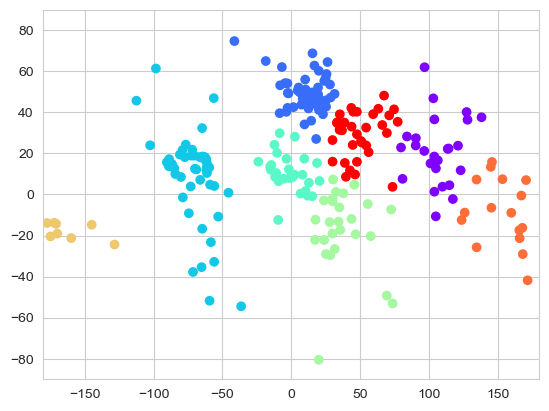

In [45]:
plt.scatter(data_with_cluster['Longitude'], data_with_cluster['Latitude'], c=data_with_cluster['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.